In [26]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Part 1: The power of matrix image reconstruction

In this problem, I will look at image compression using SVD, following the lines of the well-known "Eigenfaces" experiment. The basic concept is to represent an image (in grayscale) of size $m \times n$ as an $m \times n$ real matrix $M$. SVD is then applied to this matrix to obtain $U$, $S$, and $V$ such that $M = U S V^T$. Here $U$ and $V$ are the matrices whose columns are the left and right singular vectors respectively, and $S$ is a diagonal $m \times n$ matrix consisting of the singular values of $M$. The number of non-zero singular values is the rank of $M$. By using just the largest $k$ singular values (and corresponding left and right singular vectors), I obtain the best rank-$k$ approximation to $M$.

The following code returns the dataset of 400 images.

In [27]:
data = datasets.fetch_olivetti_faces()
images = data.images

(a) I measure the reconstruction error using mean $\ell_1$ error. For $k = 1, \dots, 30$, then I take the average rank-$k$ reconstruction error over all images in the dataset, and plot a curve of average reconstruction error as a function of $k$.

In [28]:
# Returns the best rank-k approximation to M
def svd_reconstruct(M, k):
    # TODO: Complete this!
    # Advice: pass in full_matrices=False to svd to avoid dimensionality issues
    U, S, Vt = svd(M, full_matrices= False)
    res = U[:, :k].dot(np.diag(S[:k])).dot(Vt[:k, :]) # Remember to filter up to rank-k
    return res

In [29]:
errors = []
for k in range(1, 31): # Iterate through rank k reconstructions
    total_error_k = 0 # Initialize error
    for i in images:
        reconstructed_image = svd_reconstruct(i, k) # reconstruct image through SVD.
        difference_matrix = np.abs(i - reconstructed_image) # Find difference matrix in matrix of pixels from image matrix and the reconstructed image matrix.
        total_error_k += np.mean(difference_matrix) # Find mean error of the difference matrix.
    avg_error_k = total_error_k/len(images) # Mean error of all images in the dataset.
    errors.append(avg_error_k)

Text(0, 0.5, 'Average error')

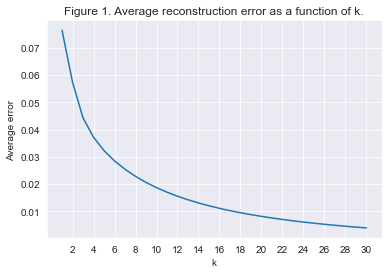

In [30]:
# Plot errors
plt.plot(range(1, 31), errors)
plt.xticks(range(2, 32, 2))
plt.title("Figure 1. Average reconstruction error as a function of k.")
plt.xlabel("k")
plt.ylabel("Average error")

(b) I display the following side-by-side as images: the original, and the best rank-$k$ approximations for $k = 10, 20, 30, 40$.

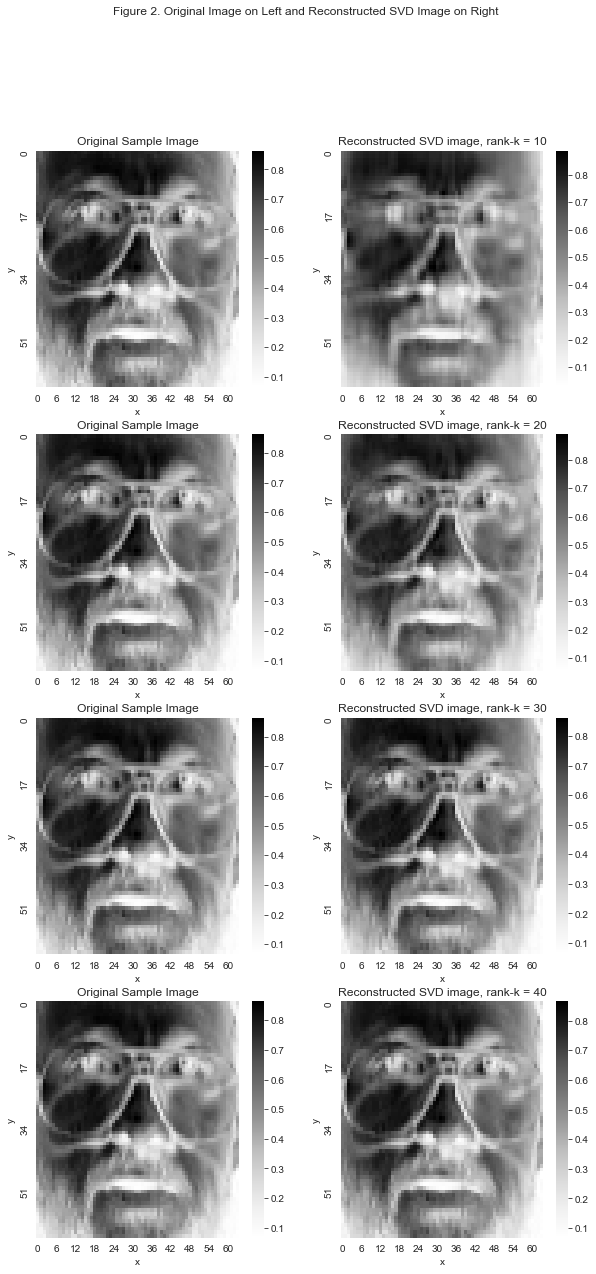

In [31]:
# Create sns heatmap subplots.
sample_image = random.choice(images)
fig, axes = plt.subplots(4, 2)
for i in range(1, 5):
    p_1 = sns.heatmap(data=svd_reconstruct(sample_image, i*10), ax=axes[i-1, 1], cmap="Greys")
    p_1.set(xlabel = "x", ylabel = "y", title = "Reconstructed SVD image, rank-k = " + str(i*10))
    p_2 = sns.heatmap(data=sample_image, ax=axes[i-1, 0], cmap="Greys")
    p_2.set(xlabel = "x", ylabel = "y", title = "Original Sample Image")
fig.suptitle("Figure 2. Original Image on Left and Reconstructed SVD Image on Right")
fig.set_size_inches(10, 20)
plt.show()

# Part 2: kmeans PCA clustering of breast cancer dataset

In this problem, I visualize the Wisconsin breast cancer dataset in two dimensions using PCA. First, rescale the data so that every feature has mean 0 and standard deviation 1 across the various points in the dataset. I may find `sklearn.preprocessing.StandardScaler` useful for this. Next, compute the top two principal components of the dataset using PCA, and for every data point, compute its coordinates (i.e. projections) along these two principal components. I complete this in two ways:
1. By using SVD directly.
2. By using `sklearn.decomposition.PCA`.

Finally, I make a scatterplot of the dataset in 2 dimensions, where the x-axis is the first principal component and the y-axis is the second. Color the points by their diagnosis (malignant or benign).

In [32]:
cancer = datasets.load_breast_cancer()

In [33]:
# Use SVD for projecting:
scaler = StandardScaler() # scale data with mean = 0 and sd_dev = 1
rescaled_data_svd = scaler.fit_transform(cancer.data)

# inspect scaled data
# print(scaler.scale_)
# print(scaler.var_)
# print(scaler.mean_)

U, S, Vt = svd(rescaled_data_svd)
# Identify principal components as eigenvectors (Vt) of svd output.
transpose_Vt = np.transpose(Vt[:2, :])
# Compute its coordinates (projections) based on principal components.
projections_svd_method = rescaled_data_svd.dot(transpose_Vt)

In [34]:
# Use PCA for projecting:
pca_transform = PCA(n_components=2)
data_pca = pca_transform.fit_transform(rescaled_data_svd)

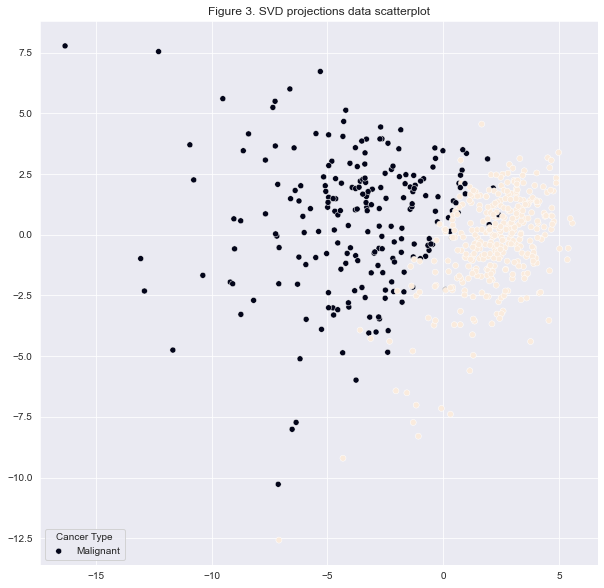

In [35]:
plt.figure(figsize=(10,10))
scatter_parta = sns.scatterplot(x=projections_svd_method[:, 0], y=projections_svd_method[:, 1], c=cancer.target)
scatter_parta.set(title = "Figure 3. SVD projections data scatterplot")
scatter_parta.legend(title='Cancer Type', loc='lower left', labels=['Malignant', 'Benign'])
plt.show()

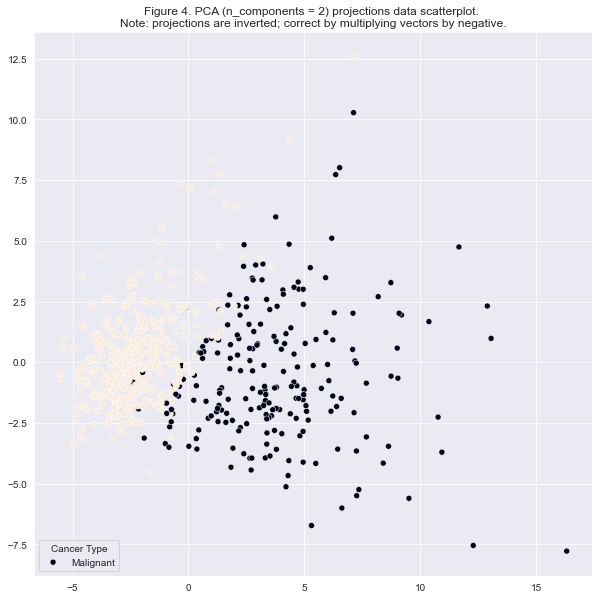

In [36]:
plt.figure(figsize=(10,10))
scatter_partb = sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], c=cancer.target)
scatter_partb.set(title = "Figure 4. PCA (n_components = 2) projections data scatterplot. \nNote: projections are inverted; correct by multiplying vectors by negative.")
scatter_partb.legend(title='Cancer Type', loc='lower left', labels=['Malignant', 'Benign'])
plt.show()

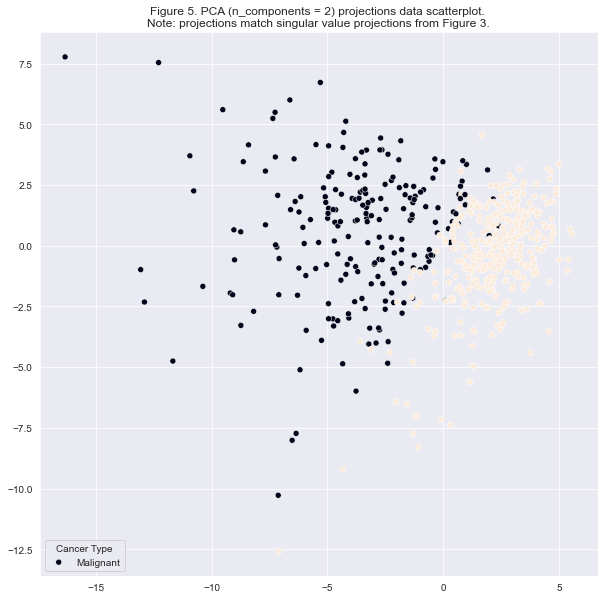

In [37]:
plt.figure(figsize=(10,10))
scatter_partc = sns.scatterplot(x=-data_pca[:, 0], y=-data_pca[:, 1], c=cancer.target)
scatter_partc.set(title = "Figure 5. PCA (n_components = 2) projections data scatterplot. \nNote: projections match singular value projections from Figure 3.")
scatter_partc.legend(title='Cancer Type', loc='lower left', labels=['Malignant', 'Benign'])
plt.show()

### It seems like that data is actually roughly separable in 2 dimensions albeit not clearly separable, but good enough to identify two-ish clusters.